In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/Life Expectancy Data.csv')

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df['Country'] = df['Country'].fillna(method='ffill')
df['Year'] = df['Year'].fillna(method='ffill')
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


<ipython-input-4-da4acba5ac2d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Country'] = df['Country'].fillna(method='ffill')
<ipython-input-4-da4acba5ac2d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Year'] = df['Year'].fillna(method='ffill')


In [ ]:
df['Life expectancy '] = df['Life expectancy '].interpolate(method='linear')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
col_to_drop = ['Status',
       'Alcohol', 'percentage expenditure',
       'Total expenditure',
       'Population',
       'Income composition of resources', 'Schooling']
df = df.drop(col_to_drop, axis=1)

In [ ]:
print(df.columns)

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score

# Features (x) and Target (y)
x = df[['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years']]

y = df['Life expectancy ']

# KNN Imputation for Features and Target
imputer = KNNImputer(n_neighbors=5)
x_imputed = imputer.fit_transform(x)

# If target 'y' contains NaNs, handle that as well
if y.isnull().any():
    y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  # Impute and flatten y
else:
    y_imputed = y.values  # If no missing values in y, use it directly

# Check for remaining NaNs after imputation
print(f"Remaining NaNs in X: {np.isnan(x_imputed).sum()}")
print(f"Remaining NaNs in Y: {np.isnan(y_imputed).sum()}")

# Proceed with the train-test split
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y_imputed, test_size=0.2, random_state=10)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Remaining NaNs in X: 0
Remaining NaNs in Y: 0
Mean Squared Error: 22.38
R-squared: 0.75


In [ ]:
df.info()
print(x)
print(y)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2938 non-null   int64  
 1   Year                   2938 non-null   int64  
 2   Life expectancy        2938 non-null   float64
 3   Adult Mortality        2928 non-null   float64
 4   infant deaths          2938 non-null   int64  
 5   Hepatitis B            2385 non-null   float64
 6   Measles                2938 non-null   int64  
 7    BMI                   2904 non-null   float64
 8   under-five deaths      2938 non-null   int64  
 9   Polio                  2919 non-null   float64
 10  Diphtheria             2919 non-null   float64
 11   HIV/AIDS              2938 non-null   float64
 12  GDP                    2490 non-null   float64
 13   thinness  1-19 years  2904 non-null   float64
 14   thinness 5-9 years    2904 non-null   float64
dtypes: f

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years
0,0,2015,65.0,263.0,62,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,17.2,17.3
1,0,2014,59.9,271.0,64,62.0,492,18.6,86,58.0,62.0,0.1,612.696514,17.5,17.5
2,0,2013,59.9,268.0,66,64.0,430,18.1,89,62.0,64.0,0.1,631.744976,17.7,17.7
3,0,2012,59.5,272.0,69,67.0,2787,17.6,93,67.0,67.0,0.1,669.959000,17.9,18.0
4,0,2011,59.2,275.0,71,68.0,3013,17.2,97,68.0,68.0,0.1,63.537231,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,44.3,723.0,27,68.0,31,27.1,42,67.0,65.0,33.6,454.366654,9.4,9.4
2934,192,2003,44.5,715.0,26,7.0,998,26.7,41,7.0,68.0,36.7,453.351155,9.8,9.9
2935,192,2002,44.8,73.0,25,73.0,304,26.3,40,73.0,71.0,39.8,57.348340,1.2,1.3
2936,192,2001,45.3,686.0,25,76.0,529,25.9,39,76.0,75.0,42.1,548.587312,1.6,1.7


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

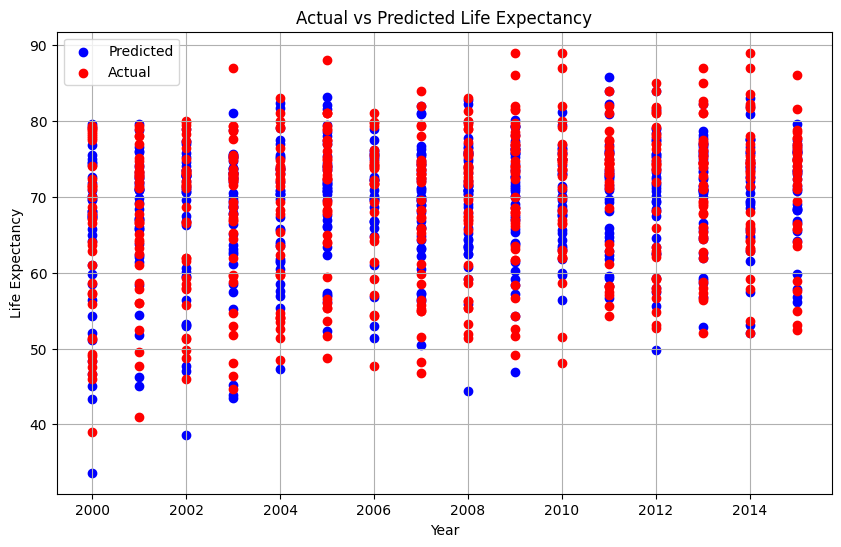

In [ ]:
import matplotlib.pyplot as plt


year_column_index = list(df.columns).index('Year')
years = x_test[:, year_column_index]

plt.figure(figsize=(10, 6))
plt.scatter(years, y_pred, color='blue', label='Predicted', marker='o')
plt.scatter(years, y_test, color='red', label='Actual')

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
import numpy as np

yr = int(input("Enter the year: "))
cntry = int(input("Enter the country code: "))

means = np.mean(x_train, axis=0)

input_features = means.copy()
input_features[0] = cntry
input_features[1] = yr

prediction = model.predict([input_features])
print(f"Predicted Life Expectancy: {prediction[0]:.2f}")


Enter the year: 1999
Enter the country code: 178
Predicted Life Expectancy: 69.10


Correlation Matrix:
                        Country      Year  Adult Mortality  infant deaths  \
Country                1.000000  0.001342         0.039802      -0.030528   
Year                   0.001342  1.000000        -0.079052      -0.037415   
Adult Mortality        0.039802 -0.079052         1.000000       0.078756   
infant deaths         -0.030528 -0.037415         0.078756       1.000000   
Hepatitis B           -0.020741  0.104333        -0.162476      -0.223566   
Measles               -0.024593 -0.082493         0.031176       0.501128   
 BMI                   0.017860  0.108974        -0.387017      -0.227279   
under-five deaths     -0.026509 -0.042937         0.094146       0.996629   
Polio                  0.017807  0.094158        -0.274823      -0.170689   
Diphtheria            -0.006138  0.134337        -0.275131      -0.175171   
 HIV/AIDS              0.090206 -0.139741         0.523821       0.025231   
GDP                   -0.016841  0.101620        -0.2960

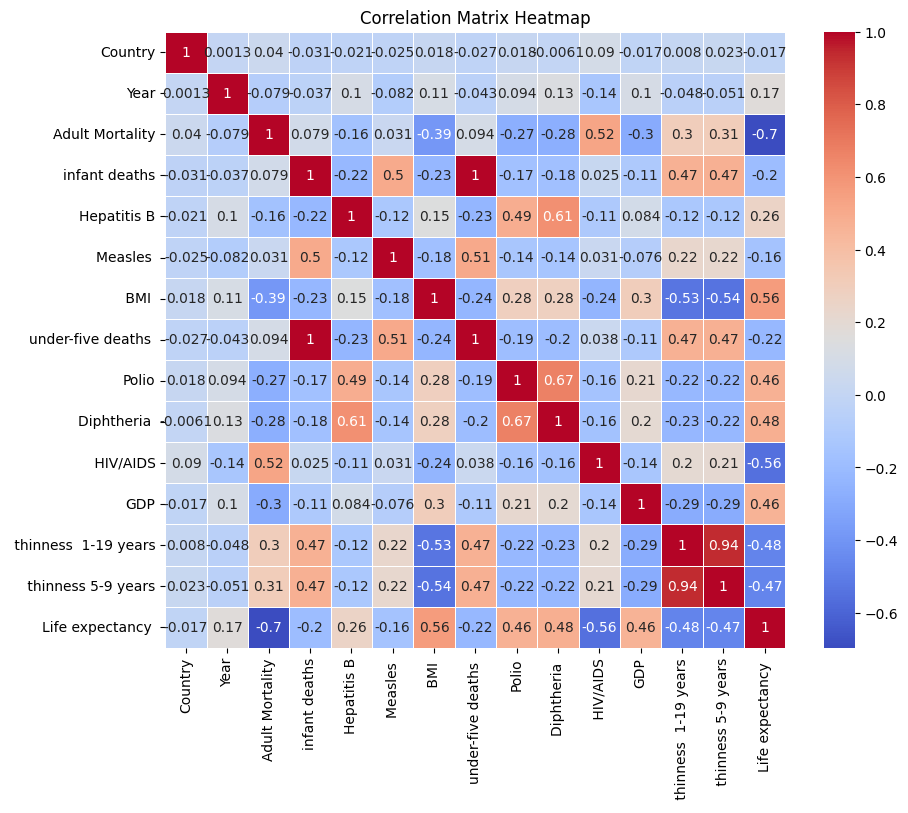

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['Country', 'Year', 'Adult Mortality', 'infant deaths', 'Hepatitis B',
                  'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ',
                  ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Life expectancy ']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plotting the heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
